In [3]:
import pandas as pd

In [4]:
cctv2015 = pd.read_excel('CCTV_2015.xls')

In [5]:
cctv2015.head()

,구별,소계,2014년 이전,2015년
0,강남구,3213,2453,760
1,강동구,1243,1101,142
2,강북구,689,542,147
3,강서구,863,686,177
4,관악구,2510,1917,593


In [6]:
pop2015 = pd.read_excel('population_2015.xls')
pop2015.head()

,구분,총인구,남자,여자
0,종로구,161331,79589,81742
1,중구,128829,63480,65349
2,용산구,228421,110575,117846
3,성동구,295266,146596,148670
4,광진구,369494,181495,187999


In [7]:
pop2015.rename(columns={pop2015.columns[0] : '구별'}, inplace = True)
pop2015.head()

,구별,총인구,남자,여자
0,종로구,161331,79589,81742
1,중구,128829,63480,65349
2,용산구,228421,110575,117846
3,성동구,295266,146596,148670
4,광진구,369494,181495,187999


In [8]:
cctv2015.sort_values(by='소계', ascending=True).head()
#cctv의 전체 개수가 가장 작은 구는 '강북구','도봉구','강서구','중랑구','송파구'이다.

,구별,소계,2014년 이전,2015년
2,강북구,689,542,147
9,도봉구,714,665,49
3,강서구,863,686,177
24,중랑구,917,815,102
17,송파구,1013,889,124


In [9]:
cctv2015.sort_values(by='소계', ascending=False).head()
#cctv가 가장 많은 구는 '강남구', '관악구', '용산구', '성동구' ,'양천구'이다.

,구별,소계,2014년 이전,2015년
0,강남구,3213,2453,760
4,관악구,2510,1917,593
20,용산구,2244,2168,76
15,성동구,2210,2112,98
18,양천구,2043,1865,178


In [10]:
pop2015.head()

,구별,총인구,남자,여자
0,종로구,161331,79589,81742
1,중구,128829,63480,65349
2,용산구,228421,110575,117846
3,성동구,295266,146596,148670
4,광진구,369494,181495,187999


In [11]:
pop2015['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [12]:
pop2015['여성비율'] = pop2015['여자'] / pop2015['총인구'] * 100
pop2015['남성비율'] = pop2015['남자'] / pop2015['총인구'] * 100
pop2015.head()

,구별,총인구,남자,여자,여성비율,남성비율
0,종로구,161331,79589,81742,50.667262,49.332738
1,중구,128829,63480,65349,50.725380,49.274620
2,용산구,228421,110575,117846,51.591579,48.408421
3,성동구,295266,146596,148670,50.351209,49.648791
4,광진구,369494,181495,187999,50.880123,49.119877


In [13]:
pop2015.sort_values(by = '총인구', ascending = False).head()
# 2017년 자치구별 인구수는 '송파구', '강서구', '노원구', 강남구', '관악구' 순으로 인구가 많다.

,구별,총인구,남자,여자,여성비율,남성비율
23,송파구,637828,310746,327082,51.280596,48.719404
15,강서구,570097,278150,291947,51.210057,48.789943
10,노원구,566097,275839,290258,51.273545,48.726455
22,강남구,540548,258775,281773,52.127286,47.872714
20,관악구,521481,263101,258380,49.547347,50.452653


In [14]:
merge2015 = pd.merge(cctv2015, pop2015, on='구별')
merge2015.head()

,구별,소계,2014년 이전,2015년,총인구,남자,여자,여성비율,남성비율
0,강남구,3213,2453,760,540548,258775,281773,52.127286,47.872714
1,강동구,1243,1101,142,449659,223280,226379,50.344594,49.655406
2,강북구,689,542,147,321909,157363,164546,51.115688,48.884312
3,강서구,863,686,177,570097,278150,291947,51.210057,48.789943
4,관악구,2510,1917,593,521481,263101,258380,49.547347,50.452653


In [15]:
merge2015.set_index('구별', inplace=True)
merge2015.head()
#그래프 그릴 것을 생각하면 인덱스 값이 구 이름이 되어야 유리하다. 

,소계,2014년 이전,2015년,총인구,남자,여자,여성비율,남성비율
구별,,,,,,,,
강남구,3213,2453,760,540548,258775,281773,52.127286,47.872714
강동구,1243,1101,142,449659,223280,226379,50.344594,49.655406
강북구,689,542,147,321909,157363,164546,51.115688,48.884312
강서구,863,686,177,570097,278150,291947,51.210057,48.789943
관악구,2510,1917,593,521481,263101,258380,49.547347,50.452653


In [16]:
import numpy as np

In [17]:
np.corrcoef(merge2015['여성비율'],merge2015['소계'])
#CCTV 개수와 여성비율과의 상관관계 확인 -> 큰 의미가 없다.

array([[ 1.        ,  0.05360258],
       [ 0.05360258,  1.        ]])

In [18]:
np.corrcoef(merge2015['남성비율'],merge2015['소계'])
#cctv 개수와 남성비율과의 관계는 큰 의미가 없다고 볼 수 있다.

array([[ 1.        , -0.05360258],
       [-0.05360258,  1.        ]])

In [19]:
np.corrcoef(merge2015['총인구'],merge2015['소계'])
#cctv개수와 총인구수의 관계는 큰 의미가 없다.

array([[ 1.        ,  0.08303336],
       [ 0.08303336,  1.        ]])

In [20]:
merge2015.sort_values(by = '소계', ascending=False).head()

,소계,2014년 이전,2015년,총인구,남자,여자,여성비율,남성비율
구별,,,,,,,,
강남구,3213,2453,760,540548,258775,281773,52.127286,47.872714
관악구,2510,1917,593,521481,263101,258380,49.547347,50.452653
용산구,2244,2168,76,228421,110575,117846,51.591579,48.408421
성동구,2210,2112,98,295266,146596,148670,50.351209,49.648791
양천구,2043,1865,178,466758,230644,236114,50.585957,49.414043


In [21]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', famaily='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~')
#matplotlib이 기본으로 가진 폰트는 한글을 지원하지 않기 때문에 폰트를 변경할 필요가 있다.

In [22]:
merge2015.head()

,소계,2014년 이전,2015년,총인구,남자,여자,여성비율,남성비율
구별,,,,,,,,
강남구,3213,2453,760,540548,258775,281773,52.127286,47.872714
강동구,1243,1101,142,449659,223280,226379,50.344594,49.655406
강북구,689,542,147,321909,157363,164546,51.115688,48.884312
강서구,863,686,177,570097,278150,291947,51.210057,48.789943
관악구,2510,1917,593,521481,263101,258380,49.547347,50.452653


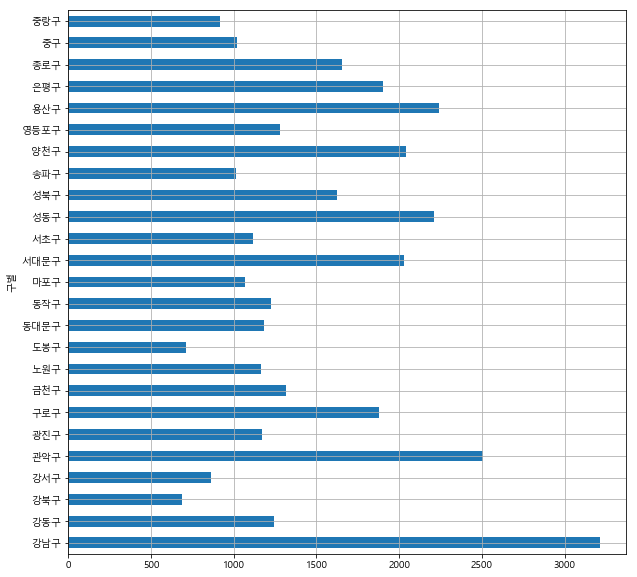

In [23]:
merge2015['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

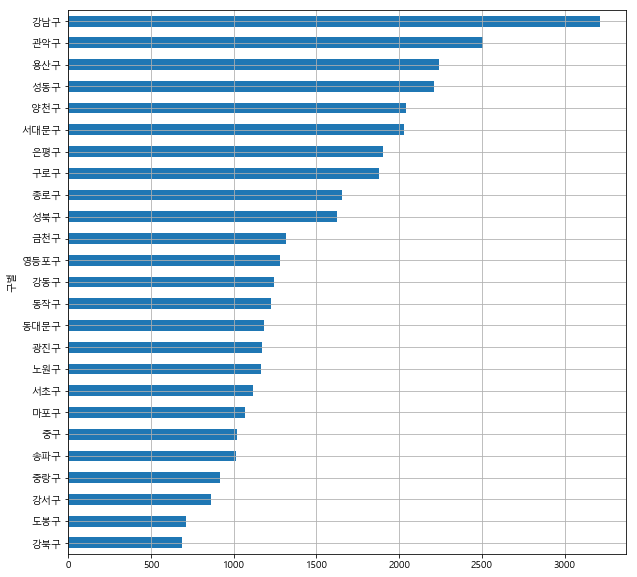

In [24]:
merge2015['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

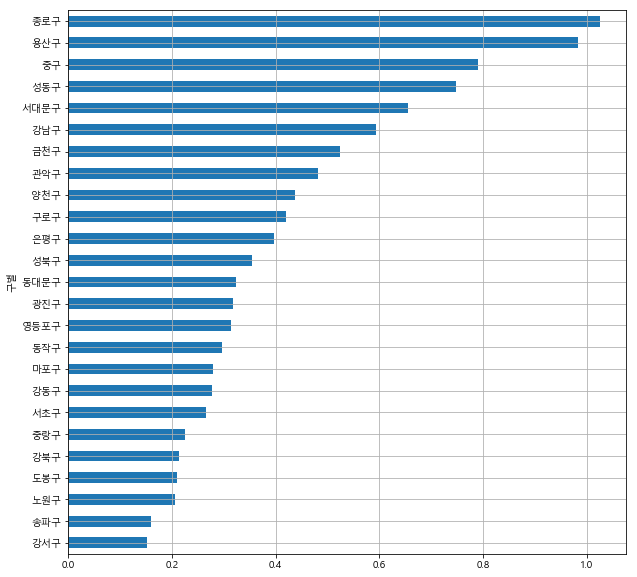

In [25]:
merge2015['CCTV비율'] = merge2015['소계'] / merge2015['총인구'] * 100
merge2015['CCTV비율'].sort_values().plot(kind='barh', grid = True, figsize=(10,10))

plt.show()
#인구 대비 CCTV 수를 보면 용산구와 종로구가 높은 것으로 확인 된다.그러나 강서구, 송파구는 인구비로 봐도 CCTV 비율이 낮음을 알 수 있다.

In [26]:
merge2015.head()

,소계,2014년 이전,2015년,총인구,남자,여자,여성비율,남성비율,CCTV비율
구별,,,,,,,,,
강남구,3213,2453,760,540548,258775,281773,52.127286,47.872714,0.594397
강동구,1243,1101,142,449659,223280,226379,50.344594,49.655406,0.276432
강북구,689,542,147,321909,157363,164546,51.115688,48.884312,0.214036
강서구,863,686,177,570097,278150,291947,51.210057,48.789943,0.151378
관악구,2510,1917,593,521481,263101,258380,49.547347,50.452653,0.481321


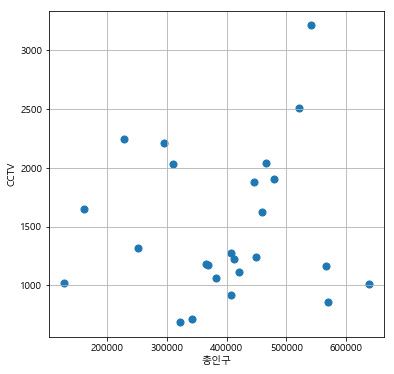

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(merge2015['총인구'], merge2015['소계'], s=50) #마커의 크기
plt.xlabel('총인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [28]:
fp1 = np.polyfit(merge2015['총인구'], merge2015['소계'], 1)
fp1

array([  4.10808030e-04,   1.32872363e+03])

In [29]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

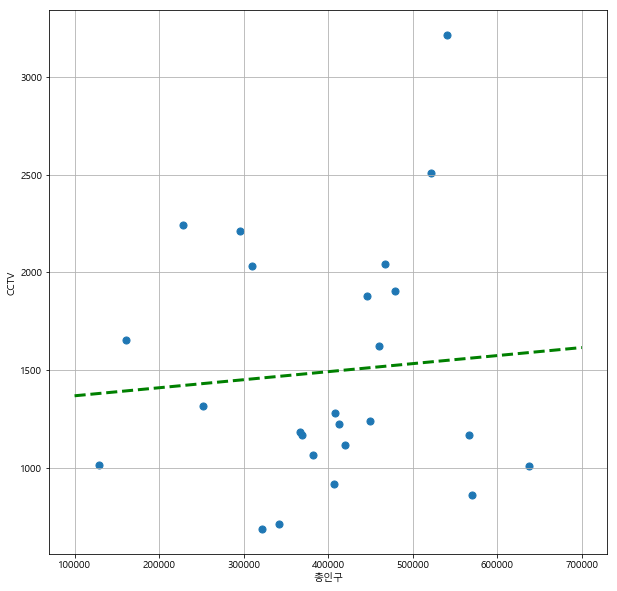

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(merge2015['총인구'], merge2015['소계'], s=50)
plt.plot(fx, f1(fx), ls ='dashed', lw = 3, color='g')
plt.xlabel('총인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()
#x축 데이터는 numpy의 linspave로 만들고, y축은 polyld로 만들 수 있다.

In [31]:
fp1 = np.polyfit(merge2015['총인구'], merge2015['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

merge2015['오차'] = np.abs(merge2015['소계'] - f1(merge2015['총인구']))

df_sort = merge2015.sort_values(by = '오차', ascending=False)
df_sort.head()

,소계,2014년 이전,2015년,총인구,남자,여자,여성비율,남성비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3213,2453,760,540548,258775,281773,52.127286,47.872714,0.594397,1662.214908
관악구,2510,1917,593,521481,263101,258380,49.547347,50.452653,0.481321,967.047785
용산구,2244,2168,76,228421,110575,117846,51.591579,48.408421,0.982397,821.439186
강북구,689,542,147,321909,157363,164546,51.115688,48.884312,0.214036,771.966435
성동구,2210,2112,98,295266,146596,148670,50.351209,49.648791,0.748478,759.978723


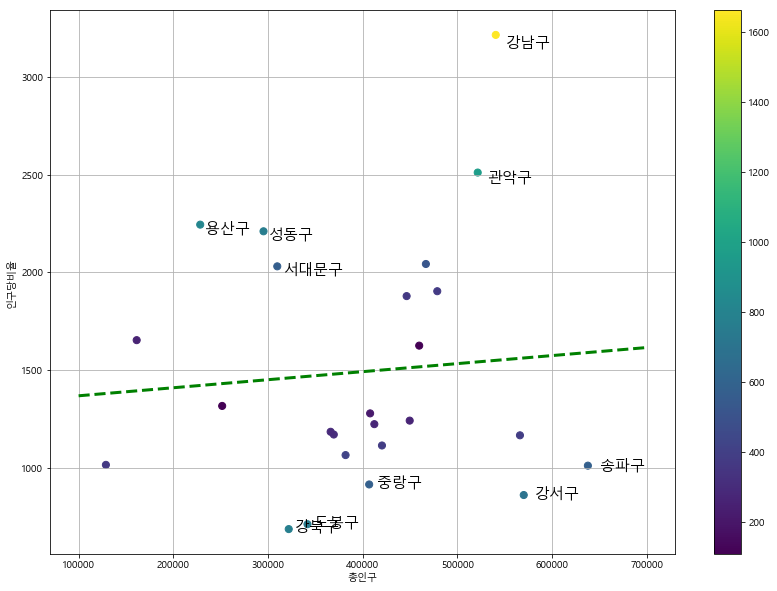

In [32]:
plt.figure(figsize=(14,10))
plt.scatter(merge2015['총인구'], merge2015['소계'], c=merge2015['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['총인구'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)
    
plt.xlabel('총인구')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

In [33]:
#직선을 기준으로 위에있는 강남구, 관악구, 구로구, 서대문구, 성동구는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 서치된 지역이다.
#송파구, 강서구, 중랑구, 도봉구, 강북구는 일반적인 경향보다 CCTV가 적게 설치된 지역이다. 
# 특히, 강남구는 월등히 많은 CCTV가 설치됐지만, 송파구는 인구수에 비해 너무나도 적은 수의 CCTV를 가지고 있다.


In [34]:
merge2015.to_csv('merge2015.csv', sep=',', encoding='utf-8')